Given a sample of music, we want to determine which instrument (e.g. trumpet, violin, piano) is playing.  

Data Source:

http://marl.smusic.nyu.edu/wordpress/projects/feature-learning-deep-architectures/deep-learning-python-tutorial/




In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Audio Feature Extraction with Librosa



In [ ]:
import librosa
import librosa.display
import librosa.feature

In [ ]:
import requests
fn = "SopSax.Vib.pp.C6Eb6.aiff"
url = "http://theremin.music.uiowa.edu/sound files/MIS/Woodwinds/sopranosaxophone/"+fn

# Load the file from url and save it in a file under the name fn
r = requests.get(url = url)
with open(fn,'wb') as f:
  f.write(r.content)

I used `librosa` to read the audio file with filename `fn` and get the samples `y` and sample rate `sr`.

In [ ]:
y, sr = librosa.load(fn)

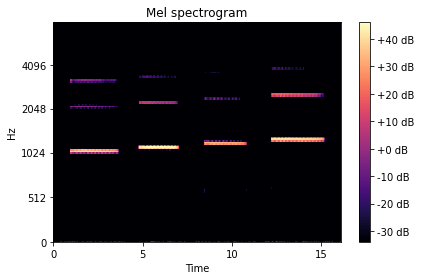

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.amplitude_to_db(S),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

## Downloading the Data

In [ ]:
# data_dir = 'instrument_dataset/'
Xtr = np.load('uiowa_train_data.npy')
ytr = np.load('uiowa_train_labels.npy')
Xts = np.load('uiowa_test_data.npy')
yts = np.load('uiowa_test_labels.npy')

In [ ]:
print("Training samples: ", Xtr.shape[0])
print("Test samples: ", Xts.shape[0])
print("Number of Features: ", Xtr.shape[1])
print("Number of Classes: ", np.unique(ytr).shape[0])

Training samples:  66247
Test samples:  14904
Number of Features:  120
Number of Classes:  10


In [ ]:
# Scale the training and test matrices
x_mean = np.mean(Xtr, axis=0)
x_std = np.std(Xtr, axis=0)
Xtr_scale = (Xtr - x_mean)/x_std
Xts_scale = (Xts - x_mean)/x_std

## Building a Neural Network Classifier

Neural network `model` with:
* `nh=256` hidden units
* `sigmoid` activation
* select the input and output shapes correctly
* print the model summary

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K


In [ ]:
K.clear_session()

In [ ]:
nin = Xtr_scale.shape[1]
nh = 256
nout = int(np.unique(ytr).shape[0])

model = Sequential()
model.add(Dense(nh, input_shape = (nin, ), activation = 'sigmoid', name = 'hidden'))
model.add(Dense(nout, activation = 'softmax', name = 'output'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 256)               30976     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 33,546
Trainable params: 33,546
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
hist = model.fit(Xtr_scale, ytr, batch_size = 100, epochs = 10, validation_data=(Xts_scale, yts))

Epoch 1/10
663/663 [==============================] - 2s 3ms/step - loss: 0.3649 - accuracy: 0.8978 - val_loss: 0.2040 - val_accuracy: 0.9369
Epoch 2/10
663/663 [==============================] - 2s 2ms/step - loss: 0.1035 - accuracy: 0.9746 - val_loss: 0.0896 - val_accuracy: 0.9791
Epoch 3/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0607 - accuracy: 0.9853 - val_loss: 0.0626 - val_accuracy: 0.9832
Epoch 4/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0426 - accuracy: 0.9890 - val_loss: 0.0517 - val_accuracy: 0.9865
Epoch 5/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0326 - accuracy: 0.9918 - val_loss: 0.0455 - val_accuracy: 0.9867
Epoch 6/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0256 - accuracy: 0.9935 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 7/10
663/663 [==============================] - 2s 2ms/step - loss: 0.0210 - accuracy: 0.9945 - val_loss: 0.0289 - val_accuracy: 0.9914
Epoch 

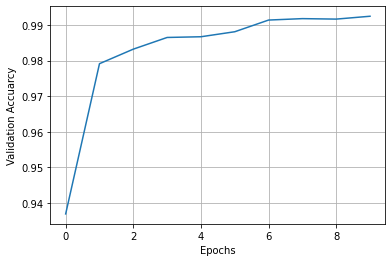

In [ ]:
val_accuracy = hist.history['val_accuracy']
plt.plot(val_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuarcy')
plt.grid()

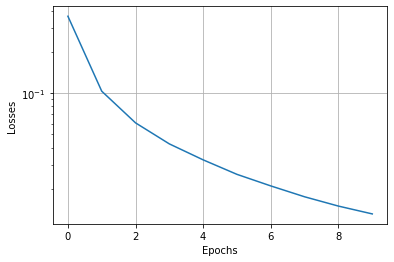

In [ ]:
loss = hist.history['loss']
plt.semilogy(loss)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.grid()

## Optimizing the Learning Rate


In [ ]:
rates = [0.01,0.001,0.0001]
batch_size = 100
loss_hist = []
acc_hist = []

nin = Xtr_scale.shape[1]
nh = 256
nout = int(np.unique(ytr).shape[0])

for lr in rates:

  K.clear_session()

  model = Sequential()
  model.add(Dense(nh, input_shape = (nin, ), activation = 'sigmoid', name = 'hidden'))
  model.add(Dense(nout, activation = 'softmax', name = 'output'))
    
  opt = optimizers.Adam(lr = lr)
  model.compile(optimizer = opt,
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])
    
  hist = model.fit(Xtr_scale, ytr, batch_size = 100, epochs = 20, validation_data=(Xts_scale, yts))
  
  loss_hist.append(hist.history['loss'])
  acc_hist.append(hist.history['accuracy'])

Epoch 1/20
663/663 [==============================] - 2s 3ms/step - loss: 0.1070 - accuracy: 0.9669 - val_loss: 0.0584 - val_accuracy: 0.9788
Epoch 2/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0464 - val_accuracy: 0.9813
Epoch 3/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.0315 - val_accuracy: 0.9885
Epoch 4/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0606 - val_accuracy: 0.9777
Epoch 5/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0152 - accuracy: 0.9947 - val_loss: 0.0386 - val_accuracy: 0.9869
Epoch 6/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.0229 - val_accuracy: 0.9923
Epoch 7/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0212 - val_accuracy: 0.9931
Epoch 

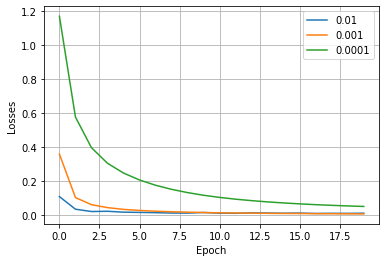

In [ ]:
plt.plot(loss_hist[0])
plt.plot(loss_hist[1])
plt.plot(loss_hist[2])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend((rates[0], rates[1], rates[2]))
plt.grid()